# Зачетная работа 
*Коробейников А.П.*

## 4. Численное интегрирование. Светимость черного тела
Согласно *формуле Планка* спектральная плотность энергетической светимости 
абсолютно чёрного тела
равна
$$
\varphi(\lambda, T) =\frac{2 \pi h c^2}{\lambda^5 \left(e^{\frac{h c}{\lambda k T}} - 1\right)},
$$
где
$h = 6.6261 \times 10^{-34}$ (постоянная Планка, $\mbox{Вт}\cdot\mbox{с}^2$);
$k = 1.3806 \times 10^{-23}$ (постоянная Больцмана, Вт с/K);
$c = 2.9979 \times 10^{8}$   (скорость света, м/с);
$T = 5778$ (эффективная температура Солнца, К).
Формула Планка позволяет узнать, какую энергию излучает единица поверхности тела с эффективной температурой $T$
за единицу времени на каждой единице длины волны $\lambda$.
Для определения энергии, излучаемой телом в определенном диапазоне частот
$\lambda_1$, $\lambda_2$, необходио найти интеграл
$$
R(\lambda_1,\lambda_2,T) = \int_{\lambda_1}^{\lambda_2} \varphi(\lambda, T) d\lambda.
$$
Применим эти знания к Солнцу.
Нас не должно удивлять, что формулу для абсолютно черного тела мы
применяем к Солцну. Среди тел нашей системы Солнце всех лучше
удовлетворяет свойствам абсолютно черного тела.

Чтобы узнать полную энергетическую светимость Солнца надо умножить
$R(\lambda_1,\lambda_2,T)$ на площадь поверхности Солнца.

Пригодится его радиус: $R = 6.957\times 10^8$ (м)

 1. Постройте для Солнца график зависимости $\varphi(\lambda, T)$ от $\lambda$.

 2. С помощью численного интегрирования найдите светимость Солнца
на видимой области длин волн, т.\,е. для $\lambda$ в диапазоне от 
$\lambda_1 = 3.5\times 10^{-7}$ до $\lambda_2 = 7\times 10^{-7}$.

 3. Найдите также светимость Солнца для всех длин волн: от $0$ до $\infty$
(вам придется брать несобственный интеграл).

 4. Этот интеграл, оказывается, можно взять аналитически
и энергетическая светимость равна $R^* = \sigma T^4$,
где 
$$
\sigma = \frac{8\pi^5 k^4}{15 c^3 h^3}
$$
Это так называемый закон *Стефана–Больцмана*.
Константа $\sigma$ называется константой Стефана–Больцмана.
Чтобы узнать полную энергетическую светимость не забудьте $R^*$
умножить на площадь поверхности Солнца. Сравните полученный результат с результатом из предыдущего пункта.

 5. Найдите так называемую *солнечную постоянную* –
мощность солнечного излучения, падающего перпендикулярно на единичную площадку
на высоте верхней границы атмосферы Земли.
Вам пригодится расстояние от Солна до Земли: $149.6\times 10^9$ м

 6. Попробуйте найти вычисленные вами величины в литературе и сравните ваши значения с найденными.
 
 7. Сделайте выводы.

# 1

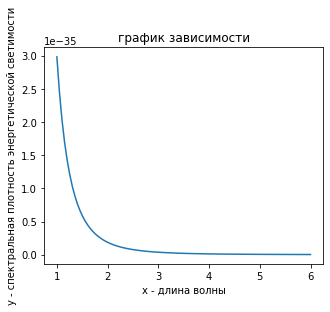

In [271]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
plt.figure(figsize = (5,4))
T = 5778
c = 2.9979*10**8
h = 6.6261*10**-34
k = 1.3806*10**-23
x = np.linspace(1,6,100)
y = (2*np.pi*h*c*c)/(x**5*(np.e**(h*c)/(x*k*T) - 1))
plt.title('график зависимости')
plt.xlabel('x - длина волны')
plt.ylabel('y - спектральная плотность энергетической светимости')
plt.plot (x,y)
pass

# 2

In [263]:
a = 3.5 * 10**(-7)
b = 7 * 10**(-7)
n = 10000
hh = (b - a)/n
x = np.arange(a + hh/2, b, hh)
y = (2*np.pi*h*c*c)/(x**5*(np.e**(h*c)/(x*k*T) - 1))
I_rect = hh*sum(y)
I_rect

2.0304869748319098e-16

In [260]:
I_trapz = integrate.trapz(y, x)
I_trapz

1.9940563833570903e-16

In [261]:
I_simps = integrate.simps(y, x)
I_simps

1.9938429993249287e-16

# 3

In [249]:
import scipy
def integrand (x):
  return (2*np.pi*h*c*c)/(x**5*(np.e**(h*c)/(x*k*T) - 1))

i = scipy.integrate.quad(integrand, 0, np.inf)
i

(8.202259989279213e-27, 1.61801232989049e-26)

In [229]:
ans = 8.2 * 10**-27 *4*np.pi*Rs**2
ans

4.987325609746773e-08

# 4

Найдем светимость солнца через закон *Стефана–Больцмана*

In [266]:
Rs = 6.957 * 10**8  #Радиус земли
const_st_b = 2*(np.pi**5)*(k**4)/(15*(c**2)*(h**3)) #постоянная Стефана-Больцмана
R = const_st_b * T**4 
ans1 = R*4*np.pi*Rs**2
ans1

3.843397958410175e+26

# 5